In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['diabetes.csv']


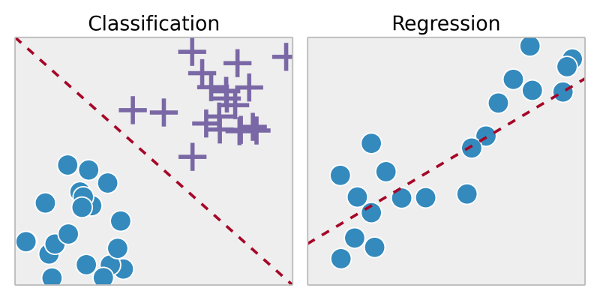

In [3]:
data=pd.read_csv('../input/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
y=data.Outcome.values
x_data=data.drop(['Outcome'],axis=1)

In [7]:
#%%normalization
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

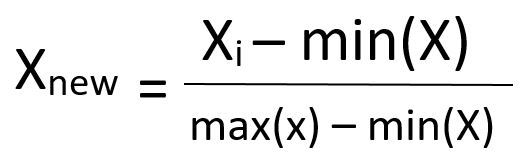

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
print('x_train:',x_train)
print('x_test:',x_test)
print('y_train:',y_train)
print('y_test:',y_test)

x_train:                                60        618    ...          435       102
Pregnancies               0.117647  0.529412    ...     0.000000  0.000000
Glucose                   0.422111  0.562814    ...     0.708543  0.628141
BloodPressure             0.000000  0.672131    ...     0.000000  0.786885
SkinThickness             0.000000  0.242424    ...     0.000000  0.000000
Insulin                   0.000000  0.000000    ...     0.000000  0.000000
BMI                       0.000000  0.420268    ...     0.631893  0.335320
DiabetesPedigreeFunction  0.096499  0.514091    ...     0.054227  0.078565
Age                       0.000000  0.483333    ...     0.133333  0.000000

[8 rows x 614 columns]
x_test:                                668       324    ...          296       462
Pregnancies               0.352941  0.117647    ...     0.117647  0.470588
Glucose                   0.492462  0.562814    ...     0.733668  0.371859
BloodPressure             0.475410  0.614754    ...     0.5

In [10]:
#parameter initialize and sigmoid function
"""
numpy.full
numpy.full(shape, fill_value, dtype=None, order='C')
Return a new array of given shape and type, filled with fill_value.
source:https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.full.html
"""
# dimension = 30

def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b


# w,b = initialize_weights_and_bias(30)

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

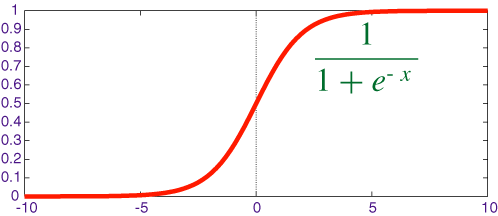

In [11]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost,gradients    



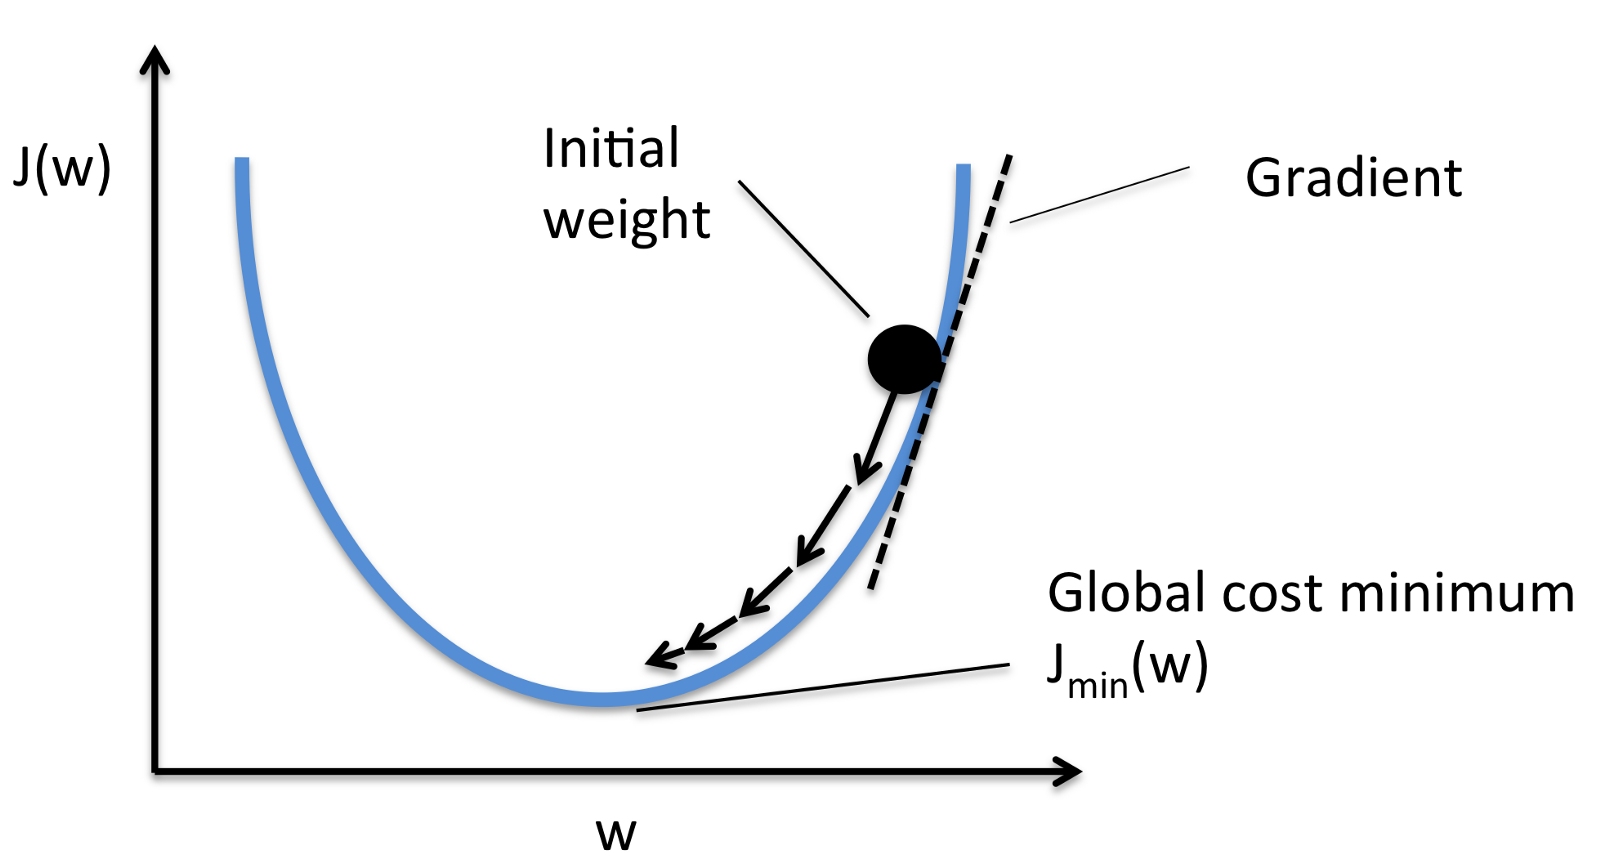

In [12]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ('Cost after iteration %i: %f' %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {'weight': w,'bias': b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel('Number of Iterarion')
    plt.ylabel('Cost')
    plt.show()
    return parameters, gradients, cost_list

In [13]:
#%%  # prediction
"""
numpy.zeros(shape, dtype=float, order='C')
Return a new array of given shape and type, filled with zeros.
source:https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html
"""
def predict(w,b,x_test):
   
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
   
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction    

Cost after iteration 0: 0.695878
Cost after iteration 10: 0.640318
Cost after iteration 20: 0.625275
Cost after iteration 30: 0.612369
Cost after iteration 40: 0.601214
Cost after iteration 50: 0.591498
Cost after iteration 60: 0.582971
Cost after iteration 70: 0.575431
Cost after iteration 80: 0.568720
Cost after iteration 90: 0.562707
Cost after iteration 100: 0.557288
Cost after iteration 110: 0.552378
Cost after iteration 120: 0.547907
Cost after iteration 130: 0.543817
Cost after iteration 140: 0.540062
Cost after iteration 150: 0.536601
Cost after iteration 160: 0.533400
Cost after iteration 170: 0.530431
Cost after iteration 180: 0.527668
Cost after iteration 190: 0.525092
Cost after iteration 200: 0.522683
Cost after iteration 210: 0.520427
Cost after iteration 220: 0.518308
Cost after iteration 230: 0.516315
Cost after iteration 240: 0.514437
Cost after iteration 250: 0.512665
Cost after iteration 260: 0.510989
Cost after iteration 270: 0.509403
Cost after iteration 280: 0.507

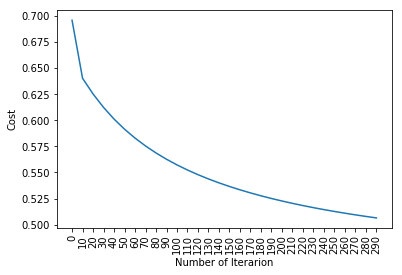

test accuracy: 75.32467532467533 %


In [14]:
# logistic_regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters['weight'],parameters['bias'],x_test)

    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300) 

In [17]:
# with sklearn
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
print('test accuracy {}'.format(lr.score(x_test.T,y_test.T)))

test accuracy 0.7857142857142857


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
